<a href="https://colab.research.google.com/github/AryakBhattacharya/QR-Generator/blob/main/QR_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install the required libraries
!pip install qrcode[pil] google-colab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 930.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.8 MB/s eta 0:00:00


In [2]:
# Mount Google Drive if not already mounted
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# QR Code Generation

Enter the text for QR code: Gourab is a big NOOB


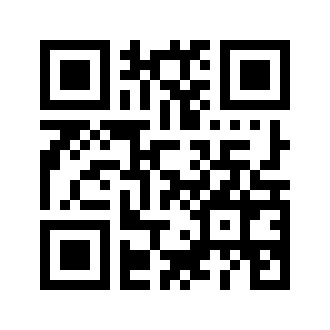

QR code generated and saved as Gourab is a big NOOB_qr_code.png in Google Drive.


In [3]:
# Import necessary libraries
import qrcode
from PIL import Image
from google.colab import drive
from IPython.display import display, Image as IPImage
import re

# Function to sanitize filename
def sanitize_filename(text):
    # Replace invalid characters with underscores
    return re.sub(r'[\/:*?"<>|]', '_', text)

# Function to generate and save QR code
def generate_qr_code(text, output_path):
    qr = qrcode.QRCode(
        version=1,
        error_correction=qrcode.constants.ERROR_CORRECT_L,
        box_size=10,
        border=4,
    )
    qr.add_data(text)
    qr.make(fit=True)

    img = qr.make_image(fill_color="black", back_color="white")
    img.save(output_path)

    # Display the QR code
    display(IPImage(output_path))

# Get user input for text
text = input("Enter the text for QR code: ")

# Sanitize the text for use as a filename
sanitized_text = sanitize_filename(text)

# Set the path to save the QR code in Google Drive
drive_path = '/content/drive/My Drive/Colab Notebooks/QR Code Generation/'
output_path = drive_path + f'{sanitized_text}_qr_code.png'

# Generate and save the QR code
generate_qr_code(text, output_path)

print(f'QR code generated and saved as {sanitized_text}_qr_code.png in Google Drive.')

# Artistic QR Code Generation

In [ ]:
import qrcode
from PIL import Image
from io import BytesIO
from google.colab import files

def generate_artistic_qr_code(link, input_image, output_image):
    # Generate QR code
    qr = qrcode.QRCode(
        version=1,
        error_correction=qrcode.constants.ERROR_CORRECT_L,
        box_size=10,
        border=4,
    )
    qr.add_data(link)
    qr.make(fit=True)

    # Create an image from the QR code instance
    qr_img = qr.make_image(fill_color="black", back_color="white")

    # Open the original image
    original_img = Image.open(BytesIO(input_image))

    # Get the size of the original image
    original_width, original_height = original_img.size

    # Resize the QR code to fit a portion of the original image
    qr_img = qr_img.resize((original_width // 3, original_height // 3))

    # Calculate the position to paste the QR code onto the original image
    paste_position = (
        (original_width - qr_img.width) // 2,
        (original_height - qr_img.height) // 2,
    )

    # Paste the QR code onto the original image
    original_img.paste(qr_img, paste_position)

    # Save the result
    original_img.save(output_image)
    print("Artistic QR code generated successfully.")

if __name__ == "__main__":
    # Get website link from user
    website_link = input("Enter the website link: ")

    # Upload input image
    print("Upload the input image:")
    uploaded_file = files.upload()

    # Get input image data
    input_image = list(uploaded_file.values())[0]

    # Get output image path from user
    output_image_path = input("Enter the path for the output image: ")

    # Generate artistic QR code
    generate_artistic_qr_code(website_link, input_image, output_image_path)


Enter the website link: aryakbhattacharya-3@oksbi
Upload the input image:


Saving FB_IMG_1702486705703.jpg to FB_IMG_1702486705703.jpg
Enter the path for the output image: /content/drive/MyDrive/Colab Notebooks/QR Code Generation


ValueError: ignored